# Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import catboost as cb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [92]:
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Load data 

In [48]:
def load_clean_data(path_name) :
    data = pd.read_csv(path_name)
    data = data.drop_duplicates()
    data.columns = data.columns.str.lower().str.replace(' ', '_')
    return data

In [49]:
df = load_clean_data('../data/data.csv')

In [50]:
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  918 non-null    int64  
 1   sex                  918 non-null    int64  
 2   chest_pain_type      918 non-null    int64  
 3   resting_bp_s         918 non-null    int64  
 4   cholesterol          918 non-null    int64  
 5   fasting_blood_sugar  918 non-null    int64  
 6   resting_ecg          918 non-null    int64  
 7   max_heart_rate       918 non-null    int64  
 8   exercise_angina      918 non-null    int64  
 9   oldpeak              918 non-null    float64
 10  st_slope             918 non-null    int64  
 11  target               918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 93.2 KB


In [52]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


# Visualization

## Pairplot

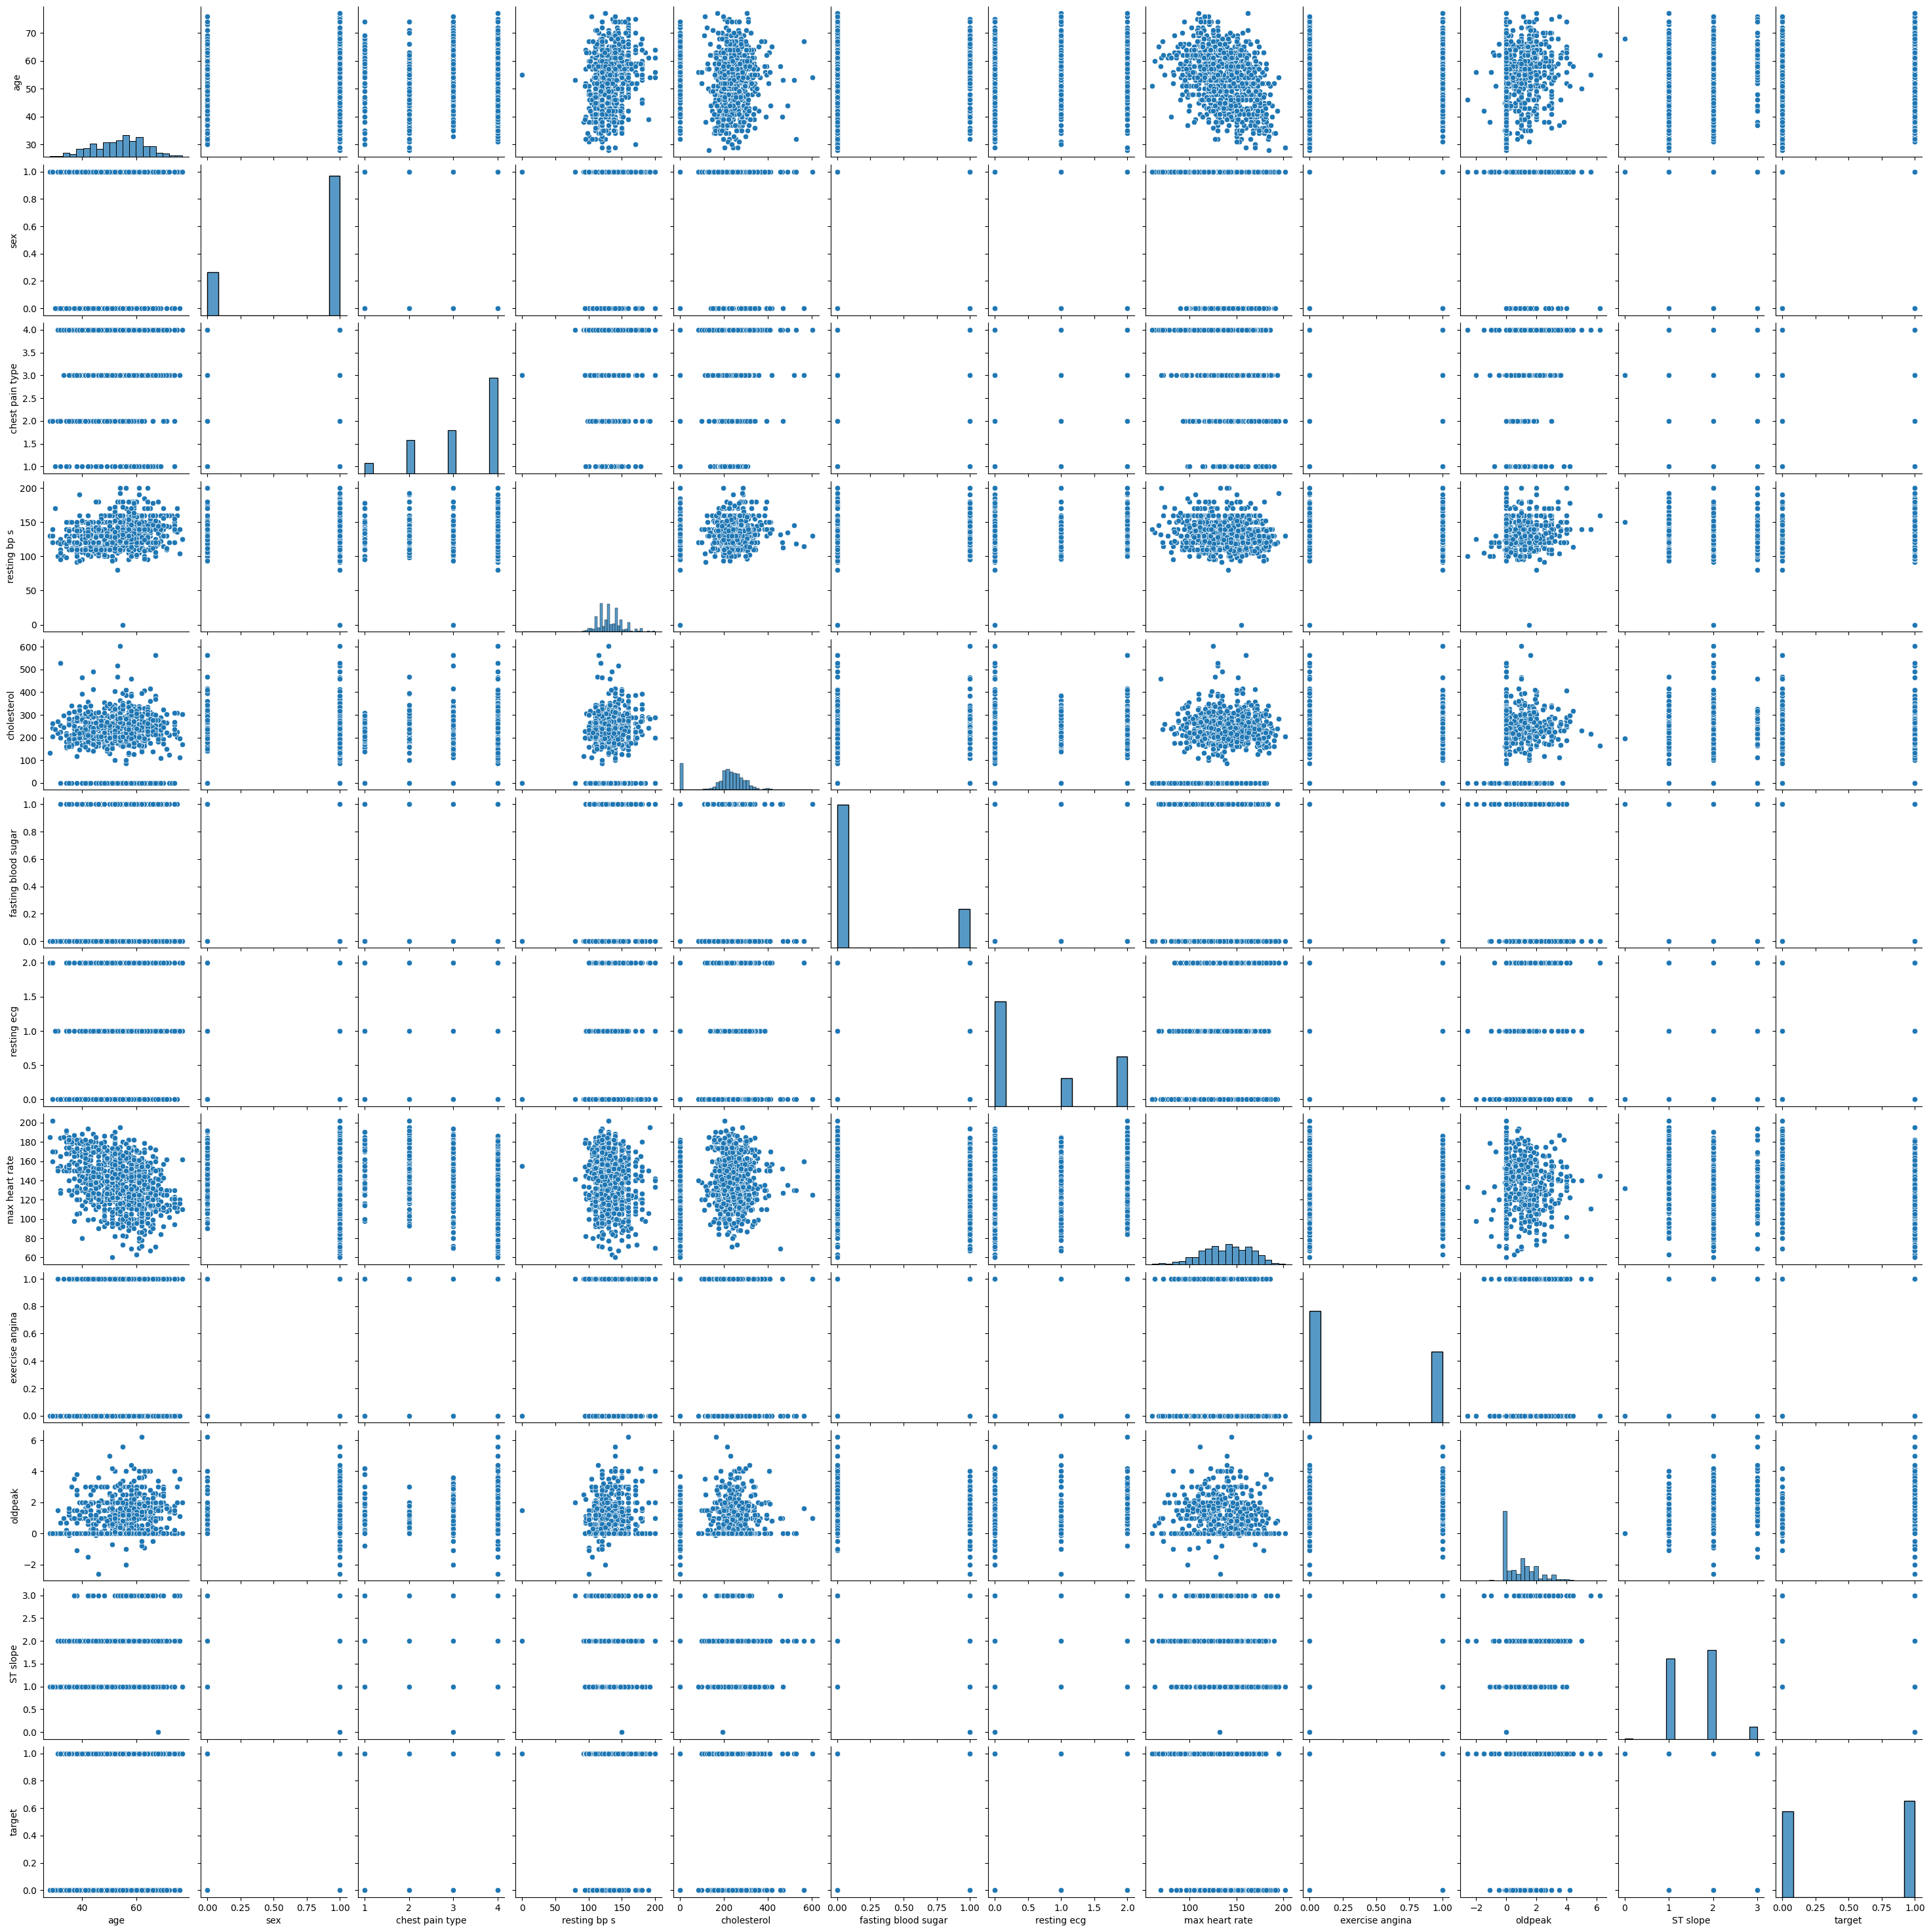

In [8]:
sns.pairplot(data = df)

## Correlation 

In [53]:
def show_correlation_matrix(df):
    corr_mat = df.corr()
    mask = np.triu(corr_mat)
    plt.figure(figsize = (10, 10))
    # corr_mat = corr_mat.mask(mask)
    sns.heatmap(corr_mat, mask=mask, cmap='coolwarm', annot=True)
    
    plt.show()

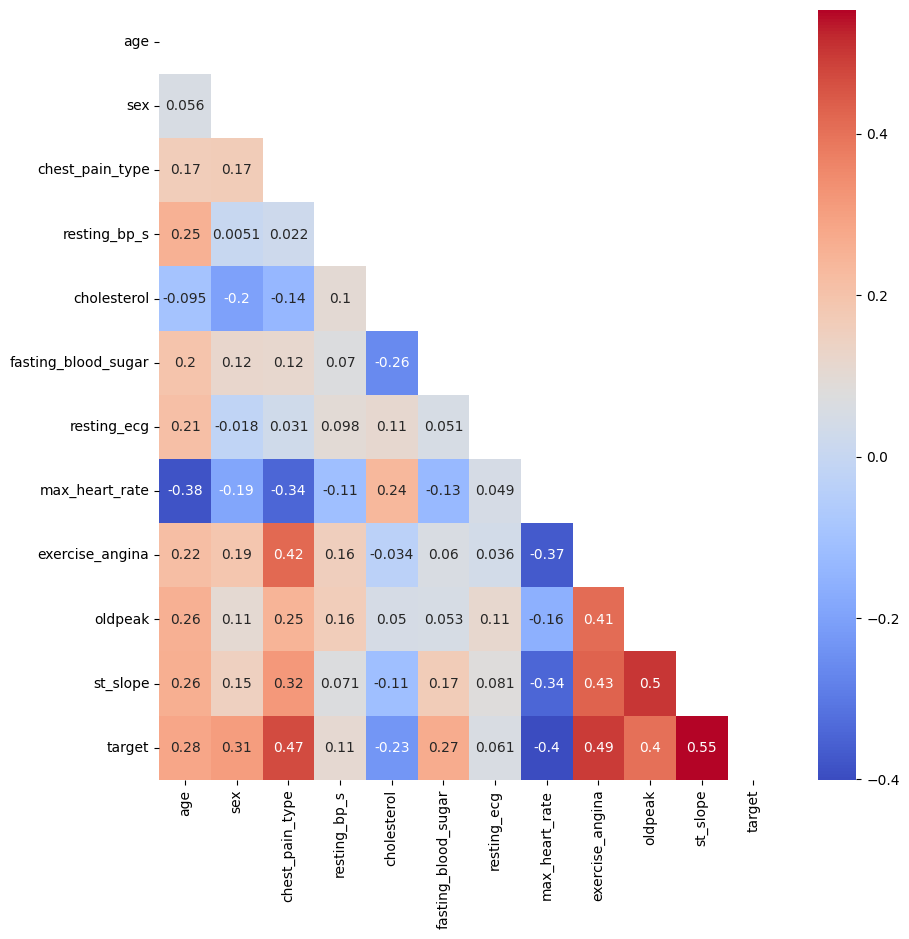

In [54]:
show_correlation_matrix(df)

# Split the data

In [55]:
X = df.drop(columns = 'target', axis = 1)
y = df['target']

# Normalization

In [56]:
def normalization(df):
    scaler = StandardScaler()
    df1 = scaler.fit_transform(df)
    df1 = pd.DataFrame(df1, columns = df.columns)
    return df1

In [57]:
X = normalization(X)
X.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
0,-1.433140,0.515952,-1.345086,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.044591
1,-0.478484,-1.938163,-0.270422,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.597420
2,-1.751359,0.515952,-1.345086,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.044591
3,-0.584556,-1.938163,0.804242,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.597420
4,0.051881,0.515952,-0.270422,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.044591


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20, random_state = 42)

In [63]:
X_train.shape

(898, 11)

In [64]:
X_test.shape

(20, 11)

# Model selection

## Logistic Regression

In [77]:
def dict_vectorizer(X_train, X_test):
    dv = DictVectorizer()
    train_dicts = X_train.to_dict(orient = 'records')
    X_train  = dv.fit_transform(train_dicts)
    test_dicts = X_test.to_dict(orient = 'records')
    X_test = dv.transform(test_dicts)
    return X_train, X_test

In [78]:
X_train, X_test = dict_vectorizer(X_train, X_test)

In [111]:
def pred_target(X_train, X_test, y_train, y_test, model):
    if (model == 'lr'):
        lr = LogisticRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        print("f1 score: ", f1_score(y_test, y_pred))
        print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
    elif (model == 'rf'):
        rf = RandomForestClassifier()
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        print("f1 score: ", f1_score(y_test, y_pred))
        print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
    elif (model == 'xgboost'):
        dtrain = xgb.DMatrix(X_train, label=y_train)
        dtest = xgb.DMatrix(X_test, label=y_test)
        
        # Specify the parameters via map
        param = {
            'max_depth': 5,  # the maximum depth of each tree
            'eta': 0.2,  # the training step for each iteration
            'objective': 'multi:softprob',  # error evaluation for multiclass training
            'num_class': 2}  # the number of classes that exist in this dataset
        num_round = 20  # the number of training iterations
        
        # Train the model
        bst = xgb.train(param, dtrain, num_round)
        
        # Make prediction
        preds = bst.predict(dtest)
        # Choose the best prediction
        best_preds = np.asarray([np.argmax(line) for line in preds])

        #f1 score
        print("f1 score: " , f1_score(y_test, best_preds))
        # Binarize the output
        lb = LabelBinarizer()
        lb.fit(y_test)
        y_test_bin = lb.transform(y_test)
        best_preds_bin = lb.transform(best_preds)
        
        # Calculate the ROC AUC score
        roc_auc = roc_auc_score(y_test_bin, best_preds_bin, average='macro')
        print("ROC AUC Score = {}".format(roc_auc))
    elif (model == 'catboost'):
        cb = CatBoostClassifier()
        cb.fit(X_train, y_train)
        y_pred = cb.predict(X_test)
        print("f1 score: ", f1_score(y_test, y_pred))
        print("roc_auc_score: ", roc_auc_score(y_test, y_pred))
        

In [108]:
pred_target(X_train, X_test, y_train, y_test, 'lr')

f1 score:  0.8571428571428571
roc_auc_score:  0.8535353535353535


In [114]:
pred_target(X_train, X_test, y_train, y_test, 'rf')

f1 score:  0.9090909090909091
roc_auc_score:  0.898989898989899


In [110]:
pred_target(X_train, X_test, y_train, y_test, 'xgboost')

f1 score:  0.9565217391304348
ROC AUC Score = 0.9444444444444444


In [112]:
pred_target(X_train, X_test, y_train, y_test, 'catboost')

Learning rate set to 0.00984
0:	learn: 0.6850710	total: 47.1ms	remaining: 47.1s
1:	learn: 0.6762164	total: 47.9ms	remaining: 23.9s
2:	learn: 0.6696657	total: 48.3ms	remaining: 16.1s
3:	learn: 0.6616153	total: 49.5ms	remaining: 12.3s
4:	learn: 0.6534021	total: 50.8ms	remaining: 10.1s
5:	learn: 0.6461884	total: 51.7ms	remaining: 8.56s
6:	learn: 0.6376117	total: 52.6ms	remaining: 7.46s
7:	learn: 0.6306248	total: 53.4ms	remaining: 6.63s
8:	learn: 0.6239276	total: 54.3ms	remaining: 5.98s
9:	learn: 0.6172238	total: 55.2ms	remaining: 5.47s
10:	learn: 0.6105786	total: 56.1ms	remaining: 5.04s
11:	learn: 0.6034275	total: 57ms	remaining: 4.69s
12:	learn: 0.5970241	total: 57.9ms	remaining: 4.39s
13:	learn: 0.5897849	total: 58.8ms	remaining: 4.14s
14:	learn: 0.5835816	total: 59.7ms	remaining: 3.92s
15:	learn: 0.5770984	total: 60.6ms	remaining: 3.72s
16:	learn: 0.5712046	total: 61.5ms	remaining: 3.56s
17:	learn: 0.5643117	total: 62.4ms	remaining: 3.4s
18:	learn: 0.5590866	total: 63.1ms	remaining: 3.

So we choose xgboost